In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import LMRt

In [2]:
job_old = pd.read_pickle('./data/job.pkl')

In [3]:
for pid, pobj in job_old.proxydb.records.items():
    print(pid, pobj.R)

Ocn_065 0.0008323822064756162
Ocn_075 0.02103204860257029
Ocn_096 0.0035625380364406154
Ocn_101 0.0010923785091157463
Ocn_070 0.0012085844059106612
Ocn_103 0.02282134449078085
Ocn_077 0.01997241350815044
Ocn_122 0.017881671983774772
Ocn_138 None
Ocn_095 0.015279238443397347
Ocn_104 0.04723797129863783
Ocn_125 0.0216975793880162
Ocn_087 0.03191761722274579


In [4]:
import cfr

In [5]:
job = cfr.ReconJob(verbose=True)
print(job)

>>> job.configs:
{}


In [6]:
job.load_proxydb('./data/pages2k_updated_Palmyra_dataset.pkl', verbose=True)

>>> job.configs["proxydb_path"] = ./data/pages2k_updated_Palmyra_dataset.pkl
>>> 692 records loaded
>>> job.proxydb created


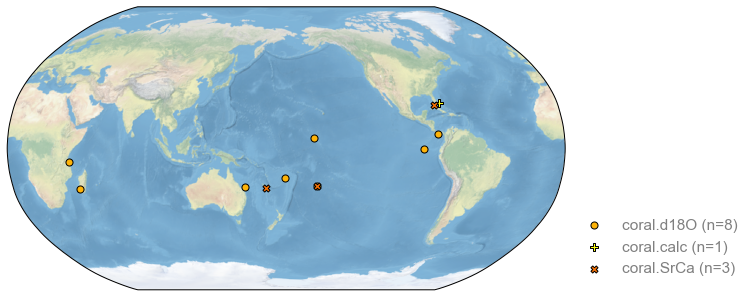

In [7]:
pids = [
    'Ocn_065',
    'Ocn_075',
    'Ocn_096',
    'Ocn_101',
    'Ocn_070',
    'Ocn_103',
    'Ocn_077',
    'Ocn_122',
    'Ocn_095',
    'Ocn_104',
    'Ocn_125',
    'Ocn_087',
]

job.filter_proxydb(by='pid', keys=pids)
fig, ax = job.proxydb.plot()

In [8]:
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'], verbose=True)

>>> job.configs["annualize_proxydb_months"] = [12, 1, 2]
>>> job.configs["annualize_proxydb_ptypes"] = ['coral']


Annualizing ProxyRecord: 100%|██████████| 12/12 [00:00<00:00, 23.72it/s]

>>> 12 records remaining
>>> job.proxydb updated


In [9]:
import numpy as np

for pid, pobj in job.proxydb.records.items():
    try:
        print(np.sum(pobj.value - job_old.proxydb.records[pid].value))
    except:
        print(pid)

0.0
0.0
0.0
0.0
0.0
Ocn_103
Ocn_077
0.0
0.0
0.0
0.0
0.0


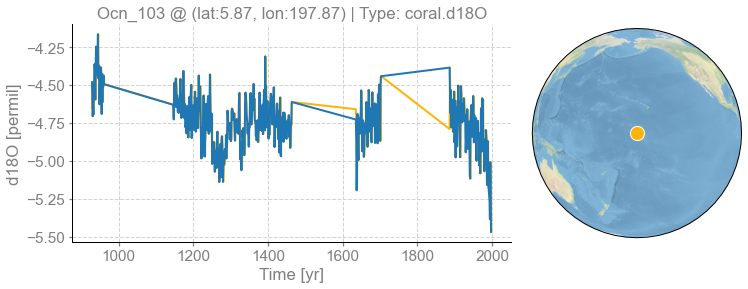

In [10]:
fig, ax = job.proxydb.records['Ocn_103'].plot()
pobj = job_old.proxydb.records['Ocn_103']
ax['ts'].plot(pobj.time, pobj.value)

531 534
928 928.0
1997 1998.0


ValueError: operands could not be broadcast together with shapes (531,) (534,) 

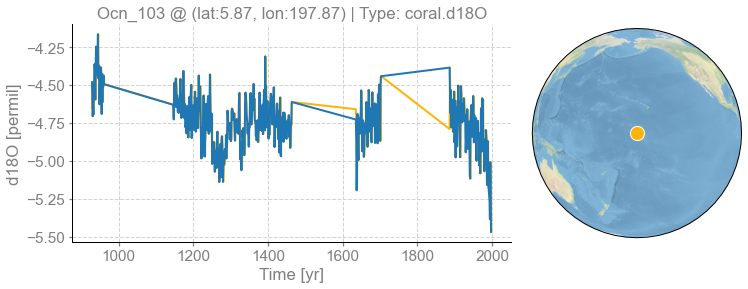

In [14]:
pid = 'Ocn_103'
fig, ax = job.proxydb.records[pid].plot()
pobj_old = job_old.proxydb.records[pid]
pobj = job.proxydb.records[pid]
ax['ts'].plot(pobj_old.time, pobj_old.value)
print(np.size(pobj_old.value), np.size(pobj.value))
print(pobj_old.time[0], pobj.time[0])
print(pobj_old.time[-1], pobj.time[-1])
print(np.sum(pobj_old.value - pobj.value))

202 203
1622 1622.0
1997 1998.0
0.0


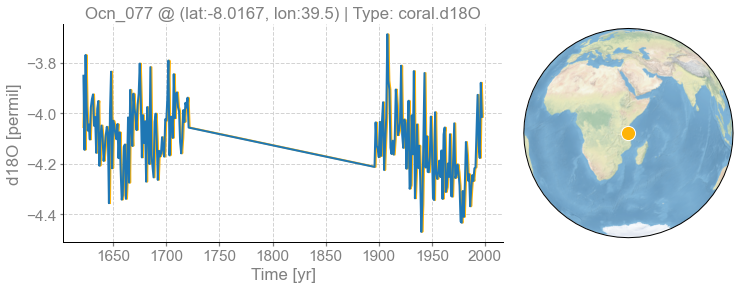

In [11]:
pid = 'Ocn_077'
fig, ax = job.proxydb.records[pid].plot()
pobj_old = job_old.proxydb.records[pid]
pobj = job.proxydb.records[pid]
ax['ts'].plot(pobj_old.time, pobj_old.value)
print(np.size(pobj_old.value), np.size(pobj.value))
print(pobj_old.time[0], pobj.time[0])
print(pobj_old.time[-1], pobj.time[-1])
print(np.sum(pobj_old.value - pobj.value[1:]))